In [1]:
%cd ..

/Users/uribagi/Documents/GitHub/Latent-IQP


In [2]:
import os
import sys
import json
import jax
import jax.numpy as jnp
import optuna 
import numpy as np 
from datasets.bipartites import BipartiteGraphDataset
from datasets.utils import vec_to_graph 
import iqpopt as iqp
from iqpopt.utils import initialize_from_data
import iqpopt.gen_qml as genq 
from utils.nisq import aachen_connectivity, efficient_connectivity_gates
from utils.hpo import run_hpo
from utils import metrics 
from iqpopt.gen_qml.utils import median_heuristic

/Users/uribagi/Documents/GitHub/Latent-IQP/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
NODES = 8
DATA_BASE_PATH = "./datasets/bipartite_data/8_nodes"

In [4]:
N_TRIALS_HPO = 500
N_ITERS_HPO = 250 

N_ITERS_FULL_TRAINING = 750

In [5]:
N_OPS_MMD = 2000
N_SAMPLES_MMD = 2000

In [6]:
RESULTS_FILE_PATH = f"./notebooks/hpo_and_evaluation_results_{8}_nodes.json"

In [7]:
grid_conn = aachen_connectivity()
num_qubits = NODES * (NODES - 1) // 2
base_key_global = jax.random.PRNGKey(42)

In [8]:
# --- Main HPO and Evaluation Loop ---
all_results = {}
file_path = "/Users/uribagi/Documents/GitHub/Latent-IQP/datasets/bipartite_data/8_nodes/baseline.pkl"
dataset = BipartiteGraphDataset.from_file(str(file_path))

Dataset loaded from /Users/uribagi/Documents/GitHub/Latent-IQP/datasets/bipartite_data/8_nodes/baseline.pkl

BIPARTITE GRAPH DATASET SUMMARY
Vertices: 8
Edge probability ranges: [(0.33, 0.33)]
Edge probabilities: [0.33]
Connected graphs only: False

Base samples: 190
Augmented samples: 570
Total samples: 760
Augmentation: 3 uniform permutation(s) per sample

Natural Distribution per Edge Probability:
  p=0.33: 190 base + 570 aug = 760 total (100.0%)

Uniqueness Analysis:
  Unique (isomorphism): 190/760 (25.0%)
  Unique (adjacency): 757/760 (99.6%)


In [9]:
train_ds = jnp.array(dataset)

In [10]:
base_sigma = median_heuristic(train_ds)

In [11]:
study = run_hpo(grid_conn, num_qubits, base_sigma, train_ds, n_trials=100, n_iters_hpo=250, n_ops=2000, n_samples=2000)

[I 2025-05-26 14:01:22,133] A new study created in memory with name: no-name-fd80d375-366a-4006-885b-31d091c5662d


Trial 0:
  Learning Rate: 0.0010059841881131612
  Sigma Multiplier: 1.554703206519228
  Initialization Multiplier: 0.07722331444476006
  Number of Layers: 4


Training Progress: 100%|██████████| 250/250 [00:05<00:00, 44.92it/s, loss=-0.000144, elapsed time=0.02, total time=6.24]
[I 2025-05-26 14:01:28,665] Trial 0 finished with value: -0.00014414903691610593 and parameters: {'learning_rate': 0.0010059841881131612, 'sigma_multiplier': 1.554703206519228, 'num_layers': 4, 'initialization_multiplier': 0.07722331444476006}. Best is trial 0 with value: -0.00014414903691610593.


Training has not converged after 250 steps
Trial 0 final loss: -0.00014415
Trial 1:
  Learning Rate: 0.00016782805459779253
  Sigma Multiplier: 0.6776416392244446
  Initialization Multiplier: 2.881837823129472
  Number of Layers: 4


Training Progress: 100%|██████████| 250/250 [00:07<00:00, 34.02it/s, loss=0.042961, elapsed time=0.03, total time=7.47]
[I 2025-05-26 14:01:36,156] Trial 1 finished with value: 0.04296099843807263 and parameters: {'learning_rate': 0.00016782805459779253, 'sigma_multiplier': 0.6776416392244446, 'num_layers': 4, 'initialization_multiplier': 2.881837823129472}. Best is trial 0 with value: -0.00014414903691610593.


Training has not converged after 250 steps
Trial 1 final loss: 0.04296100
Trial 2:
  Learning Rate: 0.0010454672249759708
  Sigma Multiplier: 1.105941774089309
  Initialization Multiplier: 2.135210707250207
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 50.98it/s, loss=0.066208, elapsed time=0.02, total time=5.05]
[I 2025-05-26 14:01:41,286] Trial 2 finished with value: 0.0662084389491481 and parameters: {'learning_rate': 0.0010454672249759708, 'sigma_multiplier': 1.105941774089309, 'num_layers': 1, 'initialization_multiplier': 2.135210707250207}. Best is trial 0 with value: -0.00014414903691610593.


Training has not converged after 250 steps
Trial 2 final loss: 0.06620844
Trial 3:
  Learning Rate: 3.94690526860616e-05
  Sigma Multiplier: 1.7175381119823006
  Initialization Multiplier: 1.9152329890583915
  Number of Layers: 4


Training Progress: 100%|██████████| 250/250 [00:05<00:00, 45.71it/s, loss=0.063673, elapsed time=0.02, total time=5.61]
[I 2025-05-26 14:01:46,919] Trial 3 finished with value: 0.06367282177646336 and parameters: {'learning_rate': 3.94690526860616e-05, 'sigma_multiplier': 1.7175381119823006, 'num_layers': 4, 'initialization_multiplier': 1.9152329890583915}. Best is trial 0 with value: -0.00014414903691610593.


Training has not converged after 250 steps
Trial 3 final loss: 0.06367282
Trial 4:
  Learning Rate: 0.002383824627225584
  Sigma Multiplier: 1.7925314844237026
  Initialization Multiplier: 0.8556009473410944
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 61.73it/s, loss=-0.000129, elapsed time=0.01, total time=4.18]
[I 2025-05-26 14:01:51,108] Trial 4 finished with value: -0.00012880691350977252 and parameters: {'learning_rate': 0.002383824627225584, 'sigma_multiplier': 1.7925314844237026, 'num_layers': 1, 'initialization_multiplier': 0.8556009473410944}. Best is trial 0 with value: -0.00014414903691610593.


Training has not converged after 250 steps
Trial 4 final loss: -0.00012881
Trial 5:
  Learning Rate: 0.05345079857724226
  Sigma Multiplier: 1.0641797057671631
  Initialization Multiplier: 0.17723250378522323
  Number of Layers: 5


Training Progress: 100%|██████████| 250/250 [00:06<00:00, 37.93it/s, loss=0.000680, elapsed time=0.02, total time=6.74]
[I 2025-05-26 14:01:57,949] Trial 5 finished with value: 0.0006798302530672595 and parameters: {'learning_rate': 0.05345079857724226, 'sigma_multiplier': 1.0641797057671631, 'num_layers': 5, 'initialization_multiplier': 0.17723250378522323}. Best is trial 0 with value: -0.00014414903691610593.


Training has not converged after 250 steps
Trial 5 final loss: 0.00067983
Trial 6:
  Learning Rate: 0.014307200352697065
  Sigma Multiplier: 0.5079231066016553
  Initialization Multiplier: 1.5978241773755704
  Number of Layers: 3


Training Progress: 100%|██████████| 250/250 [00:07<00:00, 31.80it/s, loss=0.001462, elapsed time=0.03, total time=8.01]
[I 2025-05-26 14:02:06,027] Trial 6 finished with value: 0.0014622796861723324 and parameters: {'learning_rate': 0.014307200352697065, 'sigma_multiplier': 0.5079231066016553, 'num_layers': 3, 'initialization_multiplier': 1.5978241773755704}. Best is trial 0 with value: -0.00014414903691610593.


Training has not converged after 250 steps
Trial 6 final loss: 0.00146228
Trial 7:
  Learning Rate: 0.0008997505452190181
  Sigma Multiplier: 1.805625547471191
  Initialization Multiplier: 2.914575197067572
  Number of Layers: 4


Training Progress: 100%|██████████| 250/250 [00:05<00:00, 46.05it/s, loss=-0.000017, elapsed time=0.02, total time=5.57]
[I 2025-05-26 14:02:11,618] Trial 7 finished with value: -1.6621799365723624e-05 and parameters: {'learning_rate': 0.0008997505452190181, 'sigma_multiplier': 1.805625547471191, 'num_layers': 4, 'initialization_multiplier': 2.914575197067572}. Best is trial 0 with value: -0.00014414903691610593.


Training has not converged after 250 steps
Trial 7 final loss: -0.00001662
Trial 8:
  Learning Rate: 7.578902041337095e-05
  Sigma Multiplier: 1.9765746717619048
  Initialization Multiplier: 0.11281737691215253
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:03<00:00, 63.68it/s, loss=0.038833, elapsed time=0.01, total time=4.08]
[I 2025-05-26 14:02:15,760] Trial 8 finished with value: 0.03883263708519793 and parameters: {'learning_rate': 7.578902041337095e-05, 'sigma_multiplier': 1.9765746717619048, 'num_layers': 2, 'initialization_multiplier': 0.11281737691215253}. Best is trial 0 with value: -0.00014414903691610593.


Training has not converged after 250 steps
Trial 8 final loss: 0.03883264
Trial 9:
  Learning Rate: 9.253174844272472e-05
  Sigma Multiplier: 0.4640953861859183
  Initialization Multiplier: 1.9293660785935878
  Number of Layers: 3


Training Progress: 100%|██████████| 250/250 [00:08<00:00, 30.79it/s, loss=0.067291, elapsed time=0.03, total time=8.25]
[I 2025-05-26 14:02:24,022] Trial 9 finished with value: 0.06729124000471273 and parameters: {'learning_rate': 9.253174844272472e-05, 'sigma_multiplier': 0.4640953861859183, 'num_layers': 3, 'initialization_multiplier': 1.9293660785935878}. Best is trial 0 with value: -0.00014414903691610593.


Training has not converged after 250 steps
Trial 9 final loss: 0.06729124
Trial 10:
  Learning Rate: 0.004184019363350703
  Sigma Multiplier: 1.3820820880817668
  Initialization Multiplier: 0.7811524481203072
  Number of Layers: 5


Training Progress: 100%|██████████| 250/250 [00:06<00:00, 39.43it/s, loss=-0.000039, elapsed time=0.02, total time=6.47]
[I 2025-05-26 14:02:30,514] Trial 10 finished with value: -3.9258048404172485e-05 and parameters: {'learning_rate': 0.004184019363350703, 'sigma_multiplier': 1.3820820880817668, 'num_layers': 5, 'initialization_multiplier': 0.7811524481203072}. Best is trial 0 with value: -0.00014414903691610593.


Training has not converged after 250 steps
Trial 10 final loss: -0.00003926
Trial 11:
  Learning Rate: 0.003623097680399549
  Sigma Multiplier: 1.4896423693210454
  Initialization Multiplier: 0.7848456068195439
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 58.99it/s, loss=-0.000156, elapsed time=0.02, total time=4.37]
[I 2025-05-26 14:02:34,892] Trial 11 finished with value: -0.00015641310425017535 and parameters: {'learning_rate': 0.003623097680399549, 'sigma_multiplier': 1.4896423693210454, 'num_layers': 1, 'initialization_multiplier': 0.7848456068195439}. Best is trial 11 with value: -0.00015641310425017535.


Training has not converged after 250 steps
Trial 11 final loss: -0.00015641
Trial 12:
  Learning Rate: 0.00037931517913903577
  Sigma Multiplier: 1.4364307173862152
  Initialization Multiplier: 0.7652986909372116
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 53.39it/s, loss=0.020059, elapsed time=0.02, total time=4.82]
[I 2025-05-26 14:02:39,728] Trial 12 finished with value: 0.020059261761547098 and parameters: {'learning_rate': 0.00037931517913903577, 'sigma_multiplier': 1.4364307173862152, 'num_layers': 2, 'initialization_multiplier': 0.7652986909372116}. Best is trial 11 with value: -0.00015641310425017535.


Training has not converged after 250 steps
Trial 12 final loss: 0.02005926
Trial 13:
  Learning Rate: 0.008865135171043984
  Sigma Multiplier: 1.4305570058232706
  Initialization Multiplier: 0.5851542711339152
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 54.44it/s, loss=-0.000179, elapsed time=0.02, total time=4.72]
[I 2025-05-26 14:02:44,466] Trial 13 finished with value: -0.00017931730111783555 and parameters: {'learning_rate': 0.008865135171043984, 'sigma_multiplier': 1.4305570058232706, 'num_layers': 2, 'initialization_multiplier': 0.5851542711339152}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 13 final loss: -0.00017932
Trial 14:
  Learning Rate: 0.011273074414617843
  Sigma Multiplier: 1.2525219260867833
  Initialization Multiplier: 1.133633026502778
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 50.38it/s, loss=0.000238, elapsed time=0.02, total time=5.09] 
[I 2025-05-26 14:02:49,575] Trial 14 finished with value: 0.0002382210990297193 and parameters: {'learning_rate': 0.011273074414617843, 'sigma_multiplier': 1.2525219260867833, 'num_layers': 2, 'initialization_multiplier': 1.133633026502778}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 14 final loss: 0.00023822
Trial 15:
  Learning Rate: 0.06691907714285822
  Sigma Multiplier: 0.8211363454337457
  Initialization Multiplier: 1.225558157415324
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:05<00:00, 46.98it/s, loss=0.000149, elapsed time=0.02, total time=5.45]
[I 2025-05-26 14:02:55,042] Trial 15 finished with value: 0.00014878965444701871 and parameters: {'learning_rate': 0.06691907714285822, 'sigma_multiplier': 0.8211363454337457, 'num_layers': 1, 'initialization_multiplier': 1.225558157415324}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 15 final loss: 0.00014879
Trial 16:
  Learning Rate: 0.012454897357138735
  Sigma Multiplier: 0.1459026162367525
  Initialization Multiplier: 0.49378562949877686
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:07<00:00, 31.86it/s, loss=0.000103, elapsed time=0.03, total time=7.98] 
[I 2025-05-26 14:03:03,040] Trial 16 finished with value: 0.00010333158366320927 and parameters: {'learning_rate': 0.012454897357138735, 'sigma_multiplier': 0.1459026162367525, 'num_layers': 2, 'initialization_multiplier': 0.49378562949877686}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 16 final loss: 0.00010333
Trial 17:
  Learning Rate: 0.004638260486433803
  Sigma Multiplier: 1.5774432557233553
  Initialization Multiplier: 0.4751659475771422
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 57.99it/s, loss=-0.000091, elapsed time=0.01, total time=4.44]
[I 2025-05-26 14:03:07,491] Trial 17 finished with value: -9.068125273884273e-05 and parameters: {'learning_rate': 0.004638260486433803, 'sigma_multiplier': 1.5774432557233553, 'num_layers': 1, 'initialization_multiplier': 0.4751659475771422}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 17 final loss: -0.00009068
Trial 18:
  Learning Rate: 0.029133648729660132
  Sigma Multiplier: 1.2568939362130118
  Initialization Multiplier: 1.314037899261728
  Number of Layers: 3


Training Progress: 100%|██████████| 250/250 [00:05<00:00, 45.83it/s, loss=0.000050, elapsed time=0.02, total time=5.59] 
[I 2025-05-26 14:03:13,102] Trial 18 finished with value: 4.992636673853121e-05 and parameters: {'learning_rate': 0.029133648729660132, 'sigma_multiplier': 1.2568939362130118, 'num_layers': 3, 'initialization_multiplier': 1.314037899261728}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 18 final loss: 0.00004993
Trial 19:
  Learning Rate: 0.005115325750358642
  Sigma Multiplier: 0.8221620619584754
  Initialization Multiplier: 0.5461143759750511
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:05<00:00, 44.56it/s, loss=0.000091, elapsed time=0.02, total time=5.74] 
[I 2025-05-26 14:03:18,854] Trial 19 finished with value: 9.131071157218231e-05 and parameters: {'learning_rate': 0.005115325750358642, 'sigma_multiplier': 0.8221620619584754, 'num_layers': 2, 'initialization_multiplier': 0.5461143759750511}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 19 final loss: 0.00009131
Trial 20:
  Learning Rate: 0.025246391922593845
  Sigma Multiplier: 1.249156306051945
  Initialization Multiplier: 2.409908908146234
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 53.34it/s, loss=-0.000076, elapsed time=0.02, total time=4.83]
[I 2025-05-26 14:03:23,696] Trial 20 finished with value: -7.556966556138568e-05 and parameters: {'learning_rate': 0.025246391922593845, 'sigma_multiplier': 1.249156306051945, 'num_layers': 1, 'initialization_multiplier': 2.409908908146234}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 20 final loss: -0.00007557
Trial 21:
  Learning Rate: 0.0004549238016632404
  Sigma Multiplier: 1.5538201109542438
  Initialization Multiplier: 0.09312617365619857
  Number of Layers: 4


Training Progress: 100%|██████████| 250/250 [00:05<00:00, 44.77it/s, loss=0.000093, elapsed time=0.02, total time=5.71]
[I 2025-05-26 14:03:29,430] Trial 21 finished with value: 9.336719038071898e-05 and parameters: {'learning_rate': 0.0004549238016632404, 'sigma_multiplier': 1.5538201109542438, 'num_layers': 4, 'initialization_multiplier': 0.09312617365619857}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 21 final loss: 0.00009337
Trial 22:
  Learning Rate: 0.0018073404146559623
  Sigma Multiplier: 1.6037931827227163
  Initialization Multiplier: 0.32290213704526255
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 55.12it/s, loss=-0.000102, elapsed time=0.02, total time=4.66]
[I 2025-05-26 14:03:34,108] Trial 22 finished with value: -0.00010184135866108795 and parameters: {'learning_rate': 0.0018073404146559623, 'sigma_multiplier': 1.6037931827227163, 'num_layers': 2, 'initialization_multiplier': 0.32290213704526255}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 22 final loss: -0.00010184
Trial 23:
  Learning Rate: 0.0007337680859851431
  Sigma Multiplier: 1.983055042982122
  Initialization Multiplier: 1.0211852313492549
  Number of Layers: 3


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 52.70it/s, loss=0.008422, elapsed time=0.02, total time=4.88]
[I 2025-05-26 14:03:39,007] Trial 23 finished with value: 0.008421841380331564 and parameters: {'learning_rate': 0.0007337680859851431, 'sigma_multiplier': 1.983055042982122, 'num_layers': 3, 'initialization_multiplier': 1.0211852313492549}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 23 final loss: 0.00842184
Trial 24:
  Learning Rate: 0.002824234973671219
  Sigma Multiplier: 1.4040679810148418
  Initialization Multiplier: 1.5009234453236344
  Number of Layers: 3


Training Progress: 100%|██████████| 250/250 [00:05<00:00, 48.58it/s, loss=-0.000043, elapsed time=0.02, total time=5.27]
[I 2025-05-26 14:03:44,300] Trial 24 finished with value: -4.3132418106181424e-05 and parameters: {'learning_rate': 0.002824234973671219, 'sigma_multiplier': 1.4040679810148418, 'num_layers': 3, 'initialization_multiplier': 1.5009234453236344}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 24 final loss: -0.00004313
Trial 25:
  Learning Rate: 0.006393068396628797
  Sigma Multiplier: 1.7062386200498227
  Initialization Multiplier: 0.0016057566168046905
  Number of Layers: 5


Training Progress: 100%|██████████| 250/250 [00:05<00:00, 43.14it/s, loss=-0.000111, elapsed time=0.02, total time=5.92]
[I 2025-05-26 14:03:50,246] Trial 25 finished with value: -0.00011113729692453519 and parameters: {'learning_rate': 0.006393068396628797, 'sigma_multiplier': 1.7062386200498227, 'num_layers': 5, 'initialization_multiplier': 0.0016057566168046905}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 25 final loss: -0.00011114
Trial 26:
  Learning Rate: 0.001435321660975366
  Sigma Multiplier: 1.497036730950094
  Initialization Multiplier: 0.5509256227738597
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 58.70it/s, loss=0.000013, elapsed time=0.01, total time=4.39] 
[I 2025-05-26 14:03:54,649] Trial 26 finished with value: 1.3287673440089847e-05 and parameters: {'learning_rate': 0.001435321660975366, 'sigma_multiplier': 1.497036730950094, 'num_layers': 1, 'initialization_multiplier': 0.5509256227738597}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 26 final loss: 0.00001329
Trial 27:
  Learning Rate: 0.008700124684754814
  Sigma Multiplier: 0.928563451771921
  Initialization Multiplier: 0.3804190581639273
  Number of Layers: 4


Training Progress: 100%|██████████| 250/250 [00:06<00:00, 38.28it/s, loss=0.000401, elapsed time=0.02, total time=6.66]
[I 2025-05-26 14:04:01,330] Trial 27 finished with value: 0.00040148438009218946 and parameters: {'learning_rate': 0.008700124684754814, 'sigma_multiplier': 0.928563451771921, 'num_layers': 4, 'initialization_multiplier': 0.3804190581639273}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 27 final loss: 0.00040148
Trial 28:
  Learning Rate: 0.0003078591885829574
  Sigma Multiplier: 1.1681327786986997
  Initialization Multiplier: 0.8709937200476043
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:05<00:00, 48.99it/s, loss=0.065328, elapsed time=0.02, total time=5.23]
[I 2025-05-26 14:04:06,581] Trial 28 finished with value: 0.06532841227748268 and parameters: {'learning_rate': 0.0003078591885829574, 'sigma_multiplier': 1.1681327786986997, 'num_layers': 2, 'initialization_multiplier': 0.8709937200476043}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 28 final loss: 0.06532841
Trial 29:
  Learning Rate: 0.00016582487576619062
  Sigma Multiplier: 1.3458551313121925
  Initialization Multiplier: 0.25657326976856365
  Number of Layers: 3


Training Progress: 100%|██████████| 250/250 [00:05<00:00, 48.09it/s, loss=0.000075, elapsed time=0.02, total time=5.34]
[I 2025-05-26 14:04:11,942] Trial 29 finished with value: 7.504520835911562e-05 and parameters: {'learning_rate': 0.00016582487576619062, 'sigma_multiplier': 1.3458551313121925, 'num_layers': 3, 'initialization_multiplier': 0.25657326976856365}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 29 final loss: 0.00007505
Trial 30:
  Learning Rate: 0.0031141042542007923
  Sigma Multiplier: 1.6750408149708347
  Initialization Multiplier: 3.097171361546529
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 60.14it/s, loss=0.004964, elapsed time=0.01, total time=4.3] 
[I 2025-05-26 14:04:16,255] Trial 30 finished with value: 0.004963606458158989 and parameters: {'learning_rate': 0.0031141042542007923, 'sigma_multiplier': 1.6750408149708347, 'num_layers': 1, 'initialization_multiplier': 3.097171361546529}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 30 final loss: 0.00496361
Trial 31:
  Learning Rate: 0.0022096090859472614
  Sigma Multiplier: 1.81660957250297
  Initialization Multiplier: 0.7108715563260586
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 61.72it/s, loss=-0.000111, elapsed time=0.01, total time=4.18]
[I 2025-05-26 14:04:20,452] Trial 31 finished with value: -0.00011097026637561229 and parameters: {'learning_rate': 0.0022096090859472614, 'sigma_multiplier': 1.81660957250297, 'num_layers': 1, 'initialization_multiplier': 0.7108715563260586}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 31 final loss: -0.00011097
Trial 32:
  Learning Rate: 0.0012202999709009894
  Sigma Multiplier: 1.8815693503090014
  Initialization Multiplier: 1.0154132873251693
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 61.86it/s, loss=-0.000134, elapsed time=0.01, total time=4.18]
[I 2025-05-26 14:04:24,645] Trial 32 finished with value: -0.0001340470986330808 and parameters: {'learning_rate': 0.0012202999709009894, 'sigma_multiplier': 1.8815693503090014, 'num_layers': 1, 'initialization_multiplier': 1.0154132873251693}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 32 final loss: -0.00013405
Trial 33:
  Learning Rate: 0.0011986120847060002
  Sigma Multiplier: 1.8723858074141528
  Initialization Multiplier: 0.979674721671296
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 62.34it/s, loss=-0.000141, elapsed time=0.01, total time=4.14]
[I 2025-05-26 14:04:28,799] Trial 33 finished with value: -0.00014084675170649154 and parameters: {'learning_rate': 0.0011986120847060002, 'sigma_multiplier': 1.8723858074141528, 'num_layers': 1, 'initialization_multiplier': 0.979674721671296}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 33 final loss: -0.00014085
Trial 34:
  Learning Rate: 0.00047441778298561003
  Sigma Multiplier: 1.6565345701116598
  Initialization Multiplier: 1.4185942336420854
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 53.85it/s, loss=0.034669, elapsed time=0.02, total time=4.78]
[I 2025-05-26 14:04:33,597] Trial 34 finished with value: 0.03466856107864649 and parameters: {'learning_rate': 0.00047441778298561003, 'sigma_multiplier': 1.6565345701116598, 'num_layers': 2, 'initialization_multiplier': 1.4185942336420854}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 34 final loss: 0.03466856
Trial 35:
  Learning Rate: 0.0007117006062518628
  Sigma Multiplier: 1.8625885990376703
  Initialization Multiplier: 0.6062953467292977
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 61.13it/s, loss=0.000692, elapsed time=0.02, total time=4.22]
[I 2025-05-26 14:04:37,826] Trial 35 finished with value: 0.0006922358121717367 and parameters: {'learning_rate': 0.0007117006062518628, 'sigma_multiplier': 1.8625885990376703, 'num_layers': 1, 'initialization_multiplier': 0.6062953467292977}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 35 final loss: 0.00069224
Trial 36:
  Learning Rate: 0.024691507171064456
  Sigma Multiplier: 1.4917735730938095
  Initialization Multiplier: 1.7906434272567742
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 58.27it/s, loss=-0.000142, elapsed time=0.02, total time=4.42]
[I 2025-05-26 14:04:42,260] Trial 36 finished with value: -0.00014228766170417285 and parameters: {'learning_rate': 0.024691507171064456, 'sigma_multiplier': 1.4917735730938095, 'num_layers': 1, 'initialization_multiplier': 1.7906434272567742}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 36 final loss: -0.00014229
Trial 37:
  Learning Rate: 0.021612873994726414
  Sigma Multiplier: 1.007541360631848
  Initialization Multiplier: 2.3993467830605177
  Number of Layers: 4


Training Progress: 100%|██████████| 250/250 [00:06<00:00, 39.41it/s, loss=0.000167, elapsed time=0.02, total time=6.47]
[I 2025-05-26 14:04:48,757] Trial 37 finished with value: 0.00016703006583733383 and parameters: {'learning_rate': 0.021612873994726414, 'sigma_multiplier': 1.007541360631848, 'num_layers': 4, 'initialization_multiplier': 2.3993467830605177}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 37 final loss: 0.00016703
Trial 38:
  Learning Rate: 0.0404702025776044
  Sigma Multiplier: 1.454373439568684
  Initialization Multiplier: 1.8730122996463725
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 52.98it/s, loss=-0.000023, elapsed time=0.02, total time=4.85]
[I 2025-05-26 14:04:53,620] Trial 38 finished with value: -2.2909627680980343e-05 and parameters: {'learning_rate': 0.0404702025776044, 'sigma_multiplier': 1.454373439568684, 'num_layers': 2, 'initialization_multiplier': 1.8730122996463725}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 38 final loss: -0.00002291
Trial 39:
  Learning Rate: 0.007524814568535567
  Sigma Multiplier: 1.1152082771578928
  Initialization Multiplier: 1.7107406788596862
  Number of Layers: 5


Training Progress: 100%|██████████| 250/250 [00:06<00:00, 37.91it/s, loss=0.000053, elapsed time=0.02, total time=6.73] 
[I 2025-05-26 14:05:00,378] Trial 39 finished with value: 5.291120690587986e-05 and parameters: {'learning_rate': 0.007524814568535567, 'sigma_multiplier': 1.1152082771578928, 'num_layers': 5, 'initialization_multiplier': 1.7107406788596862}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 39 final loss: 0.00005291
Trial 40:
  Learning Rate: 0.015432355186828554
  Sigma Multiplier: 1.5298701595878441
  Initialization Multiplier: 2.145710784374413
  Number of Layers: 4


Training Progress: 100%|██████████| 250/250 [00:05<00:00, 44.16it/s, loss=-0.000038, elapsed time=0.02, total time=5.8] 
[I 2025-05-26 14:05:06,200] Trial 40 finished with value: -3.7903559413839795e-05 and parameters: {'learning_rate': 0.015432355186828554, 'sigma_multiplier': 1.5298701595878441, 'num_layers': 4, 'initialization_multiplier': 2.145710784374413}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 40 final loss: -0.00003790
Trial 41:
  Learning Rate: 0.003098016716065099
  Sigma Multiplier: 1.7795515832900628
  Initialization Multiplier: 1.0285175572671041
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 62.02it/s, loss=-0.000118, elapsed time=0.01, total time=4.16]
[I 2025-05-26 14:05:10,371] Trial 41 finished with value: -0.00011825780323599295 and parameters: {'learning_rate': 0.003098016716065099, 'sigma_multiplier': 1.7795515832900628, 'num_layers': 1, 'initialization_multiplier': 1.0285175572671041}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 41 final loss: -0.00011826
Trial 42:
  Learning Rate: 0.0011539194750662867
  Sigma Multiplier: 1.3530281707199148
  Initialization Multiplier: 1.668984498924262
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 56.22it/s, loss=0.025298, elapsed time=0.02, total time=4.57]
[I 2025-05-26 14:05:14,955] Trial 42 finished with value: 0.02529758924320124 and parameters: {'learning_rate': 0.0011539194750662867, 'sigma_multiplier': 1.3530281707199148, 'num_layers': 1, 'initialization_multiplier': 1.668984498924262}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 42 final loss: 0.02529759
Trial 43:
  Learning Rate: 0.00019888798390789732
  Sigma Multiplier: 1.7365721311830251
  Initialization Multiplier: 0.20916744925584885
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:03<00:00, 70.82it/s, loss=0.050244, elapsed time=0.01, total time=3.67]
[I 2025-05-26 14:05:18,638] Trial 43 finished with value: 0.05024370732438017 and parameters: {'learning_rate': 0.00019888798390789732, 'sigma_multiplier': 1.7365721311830251, 'num_layers': 1, 'initialization_multiplier': 0.20916744925584885}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 43 final loss: 0.05024371
Trial 44:
  Learning Rate: 0.001820737331190005
  Sigma Multiplier: 1.900555159784913
  Initialization Multiplier: 0.8357864707911788
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 61.48it/s, loss=-0.000086, elapsed time=0.02, total time=4.19]
[I 2025-05-26 14:05:22,845] Trial 44 finished with value: -8.609268858628944e-05 and parameters: {'learning_rate': 0.001820737331190005, 'sigma_multiplier': 1.900555159784913, 'num_layers': 1, 'initialization_multiplier': 0.8357864707911788}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 44 final loss: -0.00008609
Trial 45:
  Learning Rate: 0.09670882846085396
  Sigma Multiplier: 1.2813962459362185
  Initialization Multiplier: 0.680113221002159
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 50.04it/s, loss=0.000203, elapsed time=0.02, total time=5.14] 
[I 2025-05-26 14:05:28,003] Trial 45 finished with value: 0.00020260452066695744 and parameters: {'learning_rate': 0.09670882846085396, 'sigma_multiplier': 1.2813962459362185, 'num_layers': 2, 'initialization_multiplier': 0.680113221002159}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 45 final loss: 0.00020260
Trial 46:
  Learning Rate: 0.003923801506782084
  Sigma Multiplier: 1.612617479463457
  Initialization Multiplier: 0.37452488041102316
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 59.02it/s, loss=-0.000149, elapsed time=0.01, total time=4.37]
[I 2025-05-26 14:05:32,387] Trial 46 finished with value: -0.00014928316137068738 and parameters: {'learning_rate': 0.003923801506782084, 'sigma_multiplier': 1.612617479463457, 'num_layers': 1, 'initialization_multiplier': 0.37452488041102316}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 46 final loss: -0.00014928
Trial 47:
  Learning Rate: 0.017765820849470253
  Sigma Multiplier: 1.6321934168777485
  Initialization Multiplier: 0.3899539634039717
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 54.07it/s, loss=-0.000093, elapsed time=0.02, total time=4.75]
[I 2025-05-26 14:05:37,160] Trial 47 finished with value: -9.254926384005008e-05 and parameters: {'learning_rate': 0.017765820849470253, 'sigma_multiplier': 1.6321934168777485, 'num_layers': 2, 'initialization_multiplier': 0.3899539634039717}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 47 final loss: -0.00009255
Trial 48:
  Learning Rate: 0.010332057854723688
  Sigma Multiplier: 1.4941766056495727
  Initialization Multiplier: 0.0028606547284571876
  Number of Layers: 3


Training Progress: 100%|██████████| 250/250 [00:05<00:00, 49.30it/s, loss=-0.000101, elapsed time=0.02, total time=5.21]
[I 2025-05-26 14:05:42,388] Trial 48 finished with value: -0.00010082013838755435 and parameters: {'learning_rate': 0.010332057854723688, 'sigma_multiplier': 1.4941766056495727, 'num_layers': 3, 'initialization_multiplier': 0.0028606547284571876}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 48 final loss: -0.00010082
Trial 49:
  Learning Rate: 0.004122065871527011
  Sigma Multiplier: 1.1701623871742304
  Initialization Multiplier: 2.1180788643647546
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 52.86it/s, loss=0.004564, elapsed time=0.02, total time=4.87]
[I 2025-05-26 14:05:47,269] Trial 49 finished with value: 0.004563619266609985 and parameters: {'learning_rate': 0.004122065871527011, 'sigma_multiplier': 1.1701623871742304, 'num_layers': 1, 'initialization_multiplier': 2.1180788643647546}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 49 final loss: 0.00456362
Trial 50:
  Learning Rate: 0.040837224612885484
  Sigma Multiplier: 0.5394847556035353
  Initialization Multiplier: 0.1946827155979734
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:07<00:00, 34.28it/s, loss=0.001146, elapsed time=0.03, total time=7.43]
[I 2025-05-26 14:05:54,713] Trial 50 finished with value: 0.0011462814862142202 and parameters: {'learning_rate': 0.040837224612885484, 'sigma_multiplier': 0.5394847556035353, 'num_layers': 2, 'initialization_multiplier': 0.1946827155979734}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 50 final loss: 0.00114628
Trial 51:
  Learning Rate: 0.0008596424739395933
  Sigma Multiplier: 1.7425508068431046
  Initialization Multiplier: 1.2065194426490187
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 59.61it/s, loss=0.000010, elapsed time=0.01, total time=4.33]
[I 2025-05-26 14:05:59,053] Trial 51 finished with value: 1.0197572727571282e-05 and parameters: {'learning_rate': 0.0008596424739395933, 'sigma_multiplier': 1.7425508068431046, 'num_layers': 1, 'initialization_multiplier': 1.2065194426490187}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 51 final loss: 0.00001020
Trial 52:
  Learning Rate: 0.005987711393274834
  Sigma Multiplier: 1.5842707368889803
  Initialization Multiplier: 0.9086758454450132
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 59.44it/s, loss=-0.000112, elapsed time=0.02, total time=4.33]
[I 2025-05-26 14:06:03,397] Trial 52 finished with value: -0.00011167902739669983 and parameters: {'learning_rate': 0.005987711393274834, 'sigma_multiplier': 1.5842707368889803, 'num_layers': 1, 'initialization_multiplier': 0.9086758454450132}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 52 final loss: -0.00011168
Trial 53:
  Learning Rate: 3.7326106247432545e-05
  Sigma Multiplier: 1.4613068163851002
  Initialization Multiplier: 0.38506804306818543
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:03<00:00, 63.19it/s, loss=0.057409, elapsed time=0.01, total time=4.09]
[I 2025-05-26 14:06:07,505] Trial 53 finished with value: 0.05740854439276021 and parameters: {'learning_rate': 3.7326106247432545e-05, 'sigma_multiplier': 1.4613068163851002, 'num_layers': 1, 'initialization_multiplier': 0.38506804306818543}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 53 final loss: 0.05740854
Trial 54:
  Learning Rate: 0.004239835795267371
  Sigma Multiplier: 1.3687085770129455
  Initialization Multiplier: 0.48243827547437085
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 55.13it/s, loss=-0.000019, elapsed time=0.02, total time=4.67]
[I 2025-05-26 14:06:12,192] Trial 54 finished with value: -1.8563387015509458e-05 and parameters: {'learning_rate': 0.004239835795267371, 'sigma_multiplier': 1.3687085770129455, 'num_layers': 1, 'initialization_multiplier': 0.48243827547437085}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 54 final loss: -0.00001856
Trial 55:
  Learning Rate: 0.0025344912522470334
  Sigma Multiplier: 1.9256239715240422
  Initialization Multiplier: 0.6434596672663527
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 62.23it/s, loss=-0.000122, elapsed time=0.02, total time=4.16]
[I 2025-05-26 14:06:16,363] Trial 55 finished with value: -0.00012188466105971898 and parameters: {'learning_rate': 0.0025344912522470334, 'sigma_multiplier': 1.9256239715240422, 'num_layers': 1, 'initialization_multiplier': 0.6434596672663527}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 55 final loss: -0.00012188
Trial 56:
  Learning Rate: 0.0014913894561592344
  Sigma Multiplier: 1.3011611479093643
  Initialization Multiplier: 0.11688632479702404
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 53.17it/s, loss=0.000067, elapsed time=0.02, total time=4.84] 
[I 2025-05-26 14:06:21,215] Trial 56 finished with value: 6.705800954853775e-05 and parameters: {'learning_rate': 0.0014913894561592344, 'sigma_multiplier': 1.3011611479093643, 'num_layers': 2, 'initialization_multiplier': 0.11688632479702404}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 56 final loss: 0.00006706
Trial 57:
  Learning Rate: 0.0006278584165185016
  Sigma Multiplier: 1.56919967683614
  Initialization Multiplier: 1.3713522512577927
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 59.23it/s, loss=0.006140, elapsed time=0.01, total time=4.36]
[I 2025-05-26 14:06:25,586] Trial 57 finished with value: 0.006140243581708326 and parameters: {'learning_rate': 0.0006278584165185016, 'sigma_multiplier': 1.56919967683614, 'num_layers': 1, 'initialization_multiplier': 1.3713522512577927}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 57 final loss: 0.00614024
Trial 58:
  Learning Rate: 0.009093716020700564
  Sigma Multiplier: 1.6751951026144287
  Initialization Multiplier: 0.27218575658352556
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 55.87it/s, loss=-0.000130, elapsed time=0.02, total time=4.6] 
[I 2025-05-26 14:06:30,207] Trial 58 finished with value: -0.00013015943407774865 and parameters: {'learning_rate': 0.009093716020700564, 'sigma_multiplier': 1.6751951026144287, 'num_layers': 2, 'initialization_multiplier': 0.27218575658352556}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 58 final loss: -0.00013016
Trial 59:
  Learning Rate: 0.01298061940143309
  Sigma Multiplier: 1.9979227673095004
  Initialization Multiplier: 1.1474913706036503
  Number of Layers: 5


Training Progress: 100%|██████████| 250/250 [00:05<00:00, 43.51it/s, loss=-0.000028, elapsed time=0.02, total time=5.87]
[I 2025-05-26 14:06:36,107] Trial 59 finished with value: -2.785612919904492e-05 and parameters: {'learning_rate': 0.01298061940143309, 'sigma_multiplier': 1.9979227673095004, 'num_layers': 5, 'initialization_multiplier': 1.1474913706036503}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 59 final loss: -0.00002786
Trial 60:
  Learning Rate: 0.030705819617700678
  Sigma Multiplier: 0.19878180480257857
  Initialization Multiplier: 1.7809409671896566
  Number of Layers: 3


Training Progress: 100%|██████████| 250/250 [00:08<00:00, 29.69it/s, loss=0.000210, elapsed time=0.03, total time=8.55]
[I 2025-05-26 14:06:44,678] Trial 60 finished with value: 0.00021000750378973078 and parameters: {'learning_rate': 0.030705819617700678, 'sigma_multiplier': 0.19878180480257857, 'num_layers': 3, 'initialization_multiplier': 1.7809409671896566}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 60 final loss: 0.00021001
Trial 61:
  Learning Rate: 0.001144866692289537
  Sigma Multiplier: 1.8326701968532204
  Initialization Multiplier: 1.0159634616694715
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 62.00it/s, loss=-0.000116, elapsed time=0.01, total time=4.16]
[I 2025-05-26 14:06:48,855] Trial 61 finished with value: -0.00011573125227537348 and parameters: {'learning_rate': 0.001144866692289537, 'sigma_multiplier': 1.8326701968532204, 'num_layers': 1, 'initialization_multiplier': 1.0159634616694715}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 61 final loss: -0.00011573
Trial 62:
  Learning Rate: 0.0034517268730646427
  Sigma Multiplier: 1.911233561454674
  Initialization Multiplier: 1.5358338379504735
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:03<00:00, 62.59it/s, loss=-0.000123, elapsed time=0.01, total time=4.13]
[I 2025-05-26 14:06:53,002] Trial 62 finished with value: -0.0001228676989656782 and parameters: {'learning_rate': 0.0034517268730646427, 'sigma_multiplier': 1.911233561454674, 'num_layers': 1, 'initialization_multiplier': 1.5358338379504735}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 62 final loss: -0.00012287
Trial 63:
  Learning Rate: 0.0021482048671106137
  Sigma Multiplier: 1.758543099289731
  Initialization Multiplier: 0.8163308944111702
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 59.17it/s, loss=-0.000112, elapsed time=0.01, total time=4.35]
[I 2025-05-26 14:06:57,368] Trial 63 finished with value: -0.00011167859662281033 and parameters: {'learning_rate': 0.0021482048671106137, 'sigma_multiplier': 1.758543099289731, 'num_layers': 1, 'initialization_multiplier': 0.8163308944111702}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 63 final loss: -0.00011168
Trial 64:
  Learning Rate: 0.0012238834465993509
  Sigma Multiplier: 1.4171373185357516
  Initialization Multiplier: 0.9326774346728282
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 57.90it/s, loss=-0.000136, elapsed time=0.02, total time=4.45]
[I 2025-05-26 14:07:01,827] Trial 64 finished with value: -0.00013576561929936018 and parameters: {'learning_rate': 0.0012238834465993509, 'sigma_multiplier': 1.4171373185357516, 'num_layers': 1, 'initialization_multiplier': 0.9326774346728282}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 64 final loss: -0.00013577
Trial 65:
  Learning Rate: 0.00579030556130201
  Sigma Multiplier: 1.4102622328688654
  Initialization Multiplier: 0.7333759095580057
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 56.45it/s, loss=-0.000148, elapsed time=0.02, total time=4.55]
[I 2025-05-26 14:07:06,392] Trial 65 finished with value: -0.00014822727280728673 and parameters: {'learning_rate': 0.00579030556130201, 'sigma_multiplier': 1.4102622328688654, 'num_layers': 1, 'initialization_multiplier': 0.7333759095580057}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 65 final loss: -0.00014823
Trial 66:
  Learning Rate: 0.006002562583481312
  Sigma Multiplier: 1.192268083992628
  Initialization Multiplier: 0.4502379492607127
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:05<00:00, 49.26it/s, loss=-0.000139, elapsed time=0.02, total time=5.21]
[I 2025-05-26 14:07:11,621] Trial 66 finished with value: -0.00013867859317831172 and parameters: {'learning_rate': 0.006002562583481312, 'sigma_multiplier': 1.192268083992628, 'num_layers': 2, 'initialization_multiplier': 0.4502379492607127}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 66 final loss: -0.00013868
Trial 67:
  Learning Rate: 0.00805014601311267
  Sigma Multiplier: 1.528203457469843
  Initialization Multiplier: 0.6642312472671972
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 58.16it/s, loss=-0.000113, elapsed time=0.01, total time=4.43]
[I 2025-05-26 14:07:16,061] Trial 67 finished with value: -0.00011345809449487477 and parameters: {'learning_rate': 0.00805014601311267, 'sigma_multiplier': 1.528203457469843, 'num_layers': 1, 'initialization_multiplier': 0.6642312472671972}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 67 final loss: -0.00011346
Trial 68:
  Learning Rate: 0.004638886756440399
  Sigma Multiplier: 1.6315603557748029
  Initialization Multiplier: 0.7530125258682282
  Number of Layers: 3


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 50.17it/s, loss=-0.000087, elapsed time=0.02, total time=5.12]
[I 2025-05-26 14:07:21,198] Trial 68 finished with value: -8.747148387508754e-05 and parameters: {'learning_rate': 0.004638886756440399, 'sigma_multiplier': 1.6315603557748029, 'num_layers': 3, 'initialization_multiplier': 0.7530125258682282}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 68 final loss: -0.00008747
Trial 69:
  Learning Rate: 0.01796343778257712
  Sigma Multiplier: 1.3199275068126013
  Initialization Multiplier: 0.5228360072767473
  Number of Layers: 4


Training Progress: 100%|██████████| 250/250 [00:05<00:00, 42.87it/s, loss=-0.000044, elapsed time=0.02, total time=5.96]
[I 2025-05-26 14:07:27,187] Trial 69 finished with value: -4.374645878836606e-05 and parameters: {'learning_rate': 0.01796343778257712, 'sigma_multiplier': 1.3199275068126013, 'num_layers': 4, 'initialization_multiplier': 0.5228360072767473}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 69 final loss: -0.00004375
Trial 70:
  Learning Rate: 0.0019093987352089765
  Sigma Multiplier: 1.4782076044161994
  Initialization Multiplier: 0.5653730997331055
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 58.18it/s, loss=-0.000095, elapsed time=0.02, total time=4.43]
[I 2025-05-26 14:07:31,633] Trial 70 finished with value: -9.485101111336991e-05 and parameters: {'learning_rate': 0.0019093987352089765, 'sigma_multiplier': 1.4782076044161994, 'num_layers': 1, 'initialization_multiplier': 0.5653730997331055}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 70 final loss: -0.00009485
Trial 71:
  Learning Rate: 0.006115181430014744
  Sigma Multiplier: 1.2148275330366387
  Initialization Multiplier: 0.34271190314013017
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 51.44it/s, loss=-0.000131, elapsed time=0.02, total time=5]   
[I 2025-05-26 14:07:36,650] Trial 71 finished with value: -0.00013087991214362713 and parameters: {'learning_rate': 0.006115181430014744, 'sigma_multiplier': 1.2148275330366387, 'num_layers': 2, 'initialization_multiplier': 0.34271190314013017}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 71 final loss: -0.00013088
Trial 72:
  Learning Rate: 0.005585447382935332
  Sigma Multiplier: 1.0315324810988231
  Initialization Multiplier: 0.47225715363309845
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:05<00:00, 49.07it/s, loss=0.000001, elapsed time=0.02, total time=5.22] 
[I 2025-05-26 14:07:41,888] Trial 72 finished with value: 1.3970524940950021e-06 and parameters: {'learning_rate': 0.005585447382935332, 'sigma_multiplier': 1.0315324810988231, 'num_layers': 2, 'initialization_multiplier': 0.47225715363309845}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 72 final loss: 0.00000140
Trial 73:
  Learning Rate: 0.0034397750631711284
  Sigma Multiplier: 1.409136790907771
  Initialization Multiplier: 0.0808459916318287
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 59.35it/s, loss=-0.000017, elapsed time=0.02, total time=4.35]
[I 2025-05-26 14:07:46,249] Trial 73 finished with value: -1.7027732526894887e-05 and parameters: {'learning_rate': 0.0034397750631711284, 'sigma_multiplier': 1.409136790907771, 'num_layers': 1, 'initialization_multiplier': 0.0808459916318287}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 73 final loss: -0.00001703
Trial 74:
  Learning Rate: 0.007080015175877713
  Sigma Multiplier: 1.1939528828848607
  Initialization Multiplier: 0.40862706688399286
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 51.32it/s, loss=-0.000141, elapsed time=0.02, total time=5]   
[I 2025-05-26 14:07:51,266] Trial 74 finished with value: -0.00014073910423094096 and parameters: {'learning_rate': 0.007080015175877713, 'sigma_multiplier': 1.1939528828848607, 'num_layers': 2, 'initialization_multiplier': 0.40862706688399286}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 74 final loss: -0.00014074
Trial 75:
  Learning Rate: 0.007529424336404894
  Sigma Multiplier: 1.078271632835972
  Initialization Multiplier: 0.2740499561716072
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 52.46it/s, loss=0.000078, elapsed time=0.02, total time=4.89] 
[I 2025-05-26 14:07:56,173] Trial 75 finished with value: 7.849218312531176e-05 and parameters: {'learning_rate': 0.007529424336404894, 'sigma_multiplier': 1.078271632835972, 'num_layers': 1, 'initialization_multiplier': 0.2740499561716072}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 75 final loss: 0.00007849
Trial 76:
  Learning Rate: 0.01081369044549138
  Sigma Multiplier: 1.598144228510423
  Initialization Multiplier: 0.7551805987799579
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 54.50it/s, loss=-0.000150, elapsed time=0.02, total time=4.72]
[I 2025-05-26 14:08:00,915] Trial 76 finished with value: -0.000150027971950014 and parameters: {'learning_rate': 0.01081369044549138, 'sigma_multiplier': 1.598144228510423, 'num_layers': 2, 'initialization_multiplier': 0.7551805987799579}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 76 final loss: -0.00015003
Trial 77:
  Learning Rate: 0.011696964009583649
  Sigma Multiplier: 1.533472370198694
  Initialization Multiplier: 0.7576643924883022
  Number of Layers: 3


Training Progress: 100%|██████████| 250/250 [00:05<00:00, 49.13it/s, loss=-0.000043, elapsed time=0.02, total time=5.23]
[I 2025-05-26 14:08:06,168] Trial 77 finished with value: -4.250332275657359e-05 and parameters: {'learning_rate': 0.011696964009583649, 'sigma_multiplier': 1.533472370198694, 'num_layers': 3, 'initialization_multiplier': 0.7576643924883022}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 77 final loss: -0.00004250
Trial 78:
  Learning Rate: 0.015415889846711404
  Sigma Multiplier: 1.67704660616167
  Initialization Multiplier: 0.9339916337906259
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 60.37it/s, loss=-0.000103, elapsed time=0.01, total time=4.27]
[I 2025-05-26 14:08:10,450] Trial 78 finished with value: -0.00010323587854085643 and parameters: {'learning_rate': 0.015415889846711404, 'sigma_multiplier': 1.67704660616167, 'num_layers': 1, 'initialization_multiplier': 0.9339916337906259}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 78 final loss: -0.00010324
Trial 79:
  Learning Rate: 0.02230210932872459
  Sigma Multiplier: 1.6290640170183426
  Initialization Multiplier: 1.0999548591408104
  Number of Layers: 4


Training Progress: 100%|██████████| 250/250 [00:05<00:00, 45.24it/s, loss=-0.000028, elapsed time=0.02, total time=5.66]
[I 2025-05-26 14:08:16,140] Trial 79 finished with value: -2.781533130984389e-05 and parameters: {'learning_rate': 0.02230210932872459, 'sigma_multiplier': 1.6290640170183426, 'num_layers': 4, 'initialization_multiplier': 1.0999548591408104}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 79 final loss: -0.00002782
Trial 80:
  Learning Rate: 5.826600004100122e-05
  Sigma Multiplier: 1.710059784230579
  Initialization Multiplier: 0.6129122675670953
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 60.87it/s, loss=0.013416, elapsed time=0.01, total time=4.23]
[I 2025-05-26 14:08:20,388] Trial 80 finished with value: 0.013416093652002154 and parameters: {'learning_rate': 5.826600004100122e-05, 'sigma_multiplier': 1.710059784230579, 'num_layers': 1, 'initialization_multiplier': 0.6129122675670953}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 80 final loss: 0.01341609
Trial 81:
  Learning Rate: 0.010708213133839977
  Sigma Multiplier: 1.4181255818388248
  Initialization Multiplier: 0.7033196105884374
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 52.98it/s, loss=-0.000164, elapsed time=0.02, total time=4.85]
[I 2025-05-26 14:08:25,259] Trial 81 finished with value: -0.00016374364215166712 and parameters: {'learning_rate': 0.010708213133839977, 'sigma_multiplier': 1.4181255818388248, 'num_layers': 2, 'initialization_multiplier': 0.7033196105884374}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 81 final loss: -0.00016374
Trial 82:
  Learning Rate: 0.011452630386300216
  Sigma Multiplier: 1.4345169916527545
  Initialization Multiplier: 0.7060505342123242
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 53.00it/s, loss=-0.000140, elapsed time=0.02, total time=4.85]
[I 2025-05-26 14:08:30,123] Trial 82 finished with value: -0.0001402564296566534 and parameters: {'learning_rate': 0.011452630386300216, 'sigma_multiplier': 1.4345169916527545, 'num_layers': 2, 'initialization_multiplier': 0.7060505342123242}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 82 final loss: -0.00014026
Trial 83:
  Learning Rate: 0.009274699521567207
  Sigma Multiplier: 1.5927050194870356
  Initialization Multiplier: 0.8530644952286601
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 54.55it/s, loss=-0.000123, elapsed time=0.02, total time=4.72]
[I 2025-05-26 14:08:34,862] Trial 83 finished with value: -0.00012326697340705325 and parameters: {'learning_rate': 0.009274699521567207, 'sigma_multiplier': 1.5927050194870356, 'num_layers': 2, 'initialization_multiplier': 0.8530644952286601}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 83 final loss: -0.00012327
Trial 84:
  Learning Rate: 0.032539187029418624
  Sigma Multiplier: 1.507577435105029
  Initialization Multiplier: 2.0214125946111756
  Number of Layers: 3


Training Progress: 100%|██████████| 250/250 [00:05<00:00, 47.98it/s, loss=0.000005, elapsed time=0.02, total time=5.35] 
[I 2025-05-26 14:08:40,233] Trial 84 finished with value: 5.267188674380663e-06 and parameters: {'learning_rate': 0.032539187029418624, 'sigma_multiplier': 1.507577435105029, 'num_layers': 3, 'initialization_multiplier': 2.0214125946111756}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 84 final loss: 0.00000527
Trial 85:
  Learning Rate: 0.0026056512396229097
  Sigma Multiplier: 1.365092701395327
  Initialization Multiplier: 0.5725795089239647
  Number of Layers: 1


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 57.26it/s, loss=-0.000099, elapsed time=0.02, total time=4.5] 
[I 2025-05-26 14:08:44,742] Trial 85 finished with value: -9.88689595477974e-05 and parameters: {'learning_rate': 0.0026056512396229097, 'sigma_multiplier': 1.365092701395327, 'num_layers': 1, 'initialization_multiplier': 0.5725795089239647}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 85 final loss: -0.00009887
Trial 86:
  Learning Rate: 0.003721920676082502
  Sigma Multiplier: 1.5756873126187236
  Initialization Multiplier: 0.7473969926974071
  Number of Layers: 3


Training Progress: 100%|██████████| 250/250 [00:05<00:00, 48.56it/s, loss=-0.000066, elapsed time=0.02, total time=5.28]
[I 2025-05-26 14:08:50,044] Trial 86 finished with value: -6.58684758993268e-05 and parameters: {'learning_rate': 0.003721920676082502, 'sigma_multiplier': 1.5756873126187236, 'num_layers': 3, 'initialization_multiplier': 0.7473969926974071}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 86 final loss: -0.00006587
Trial 87:
  Learning Rate: 0.0008822470499548345
  Sigma Multiplier: 1.2702740147041924
  Initialization Multiplier: 0.6414520841587459
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 53.07it/s, loss=-0.000172, elapsed time=0.02, total time=4.85]
[I 2025-05-26 14:08:54,909] Trial 87 finished with value: -0.00017213973419068682 and parameters: {'learning_rate': 0.0008822470499548345, 'sigma_multiplier': 1.2702740147041924, 'num_layers': 2, 'initialization_multiplier': 0.6414520841587459}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 87 final loss: -0.00017214
Trial 88:
  Learning Rate: 0.0009039370036618123
  Sigma Multiplier: 1.260152208279968
  Initialization Multiplier: 0.14038967100111505
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 53.11it/s, loss=0.000626, elapsed time=0.02, total time=4.85]
[I 2025-05-26 14:08:59,772] Trial 88 finished with value: 0.0006255718900232628 and parameters: {'learning_rate': 0.0009039370036618123, 'sigma_multiplier': 1.260152208279968, 'num_layers': 2, 'initialization_multiplier': 0.14038967100111505}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 88 final loss: 0.00062557
Trial 89:
  Learning Rate: 0.0051205622789837505
  Sigma Multiplier: 1.3275294144512935
  Initialization Multiplier: 0.29366070507457687
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 50.66it/s, loss=-0.000142, elapsed time=0.02, total time=5.07]
[I 2025-05-26 14:09:04,860] Trial 89 finished with value: -0.00014214639162087633 and parameters: {'learning_rate': 0.0051205622789837505, 'sigma_multiplier': 1.3275294144512935, 'num_layers': 2, 'initialization_multiplier': 0.29366070507457687}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 89 final loss: -0.00014215
Trial 90:
  Learning Rate: 0.00038877771726436426
  Sigma Multiplier: 1.4531306831956403
  Initialization Multiplier: 2.635494450536493
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 52.57it/s, loss=0.045859, elapsed time=0.02, total time=4.88]
[I 2025-05-26 14:09:09,763] Trial 90 finished with value: 0.045859408904598026 and parameters: {'learning_rate': 0.00038877771726436426, 'sigma_multiplier': 1.4531306831956403, 'num_layers': 2, 'initialization_multiplier': 2.635494450536493}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 90 final loss: 0.04585941
Trial 91:
  Learning Rate: 0.00480369922588856
  Sigma Multiplier: 1.3352707121924694
  Initialization Multiplier: 0.3411501770181223
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 52.33it/s, loss=-0.000087, elapsed time=0.02, total time=4.91]
[I 2025-05-26 14:09:14,695] Trial 91 finished with value: -8.670729518718442e-05 and parameters: {'learning_rate': 0.00480369922588856, 'sigma_multiplier': 1.3352707121924694, 'num_layers': 2, 'initialization_multiplier': 0.3411501770181223}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 91 final loss: -0.00008671
Trial 92:
  Learning Rate: 0.0014466142875602143
  Sigma Multiplier: 1.3820323538646264
  Initialization Multiplier: 0.05374294158021997
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 53.81it/s, loss=-0.000026, elapsed time=0.02, total time=4.78]
[I 2025-05-26 14:09:19,492] Trial 92 finished with value: -2.612414599173358e-05 and parameters: {'learning_rate': 0.0014466142875602143, 'sigma_multiplier': 1.3820323538646264, 'num_layers': 2, 'initialization_multiplier': 0.05374294158021997}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 92 final loss: -0.00002612
Trial 93:
  Learning Rate: 0.0005295709475208415
  Sigma Multiplier: 1.3001685564842906
  Initialization Multiplier: 0.21532231544345065
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 52.69it/s, loss=0.002404, elapsed time=0.02, total time=4.87]
[I 2025-05-26 14:09:24,382] Trial 93 finished with value: 0.0024040083925312506 and parameters: {'learning_rate': 0.0005295709475208415, 'sigma_multiplier': 1.3001685564842906, 'num_layers': 2, 'initialization_multiplier': 0.21532231544345065}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 93 final loss: 0.00240401
Trial 94:
  Learning Rate: 0.01867352344251454
  Sigma Multiplier: 1.4795332315848673
  Initialization Multiplier: 0.28437566370422185
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 53.46it/s, loss=-0.000120, elapsed time=0.02, total time=4.82]
[I 2025-05-26 14:09:29,216] Trial 94 finished with value: -0.00011965036624129336 and parameters: {'learning_rate': 0.01867352344251454, 'sigma_multiplier': 1.4795332315848673, 'num_layers': 2, 'initialization_multiplier': 0.28437566370422185}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 94 final loss: -0.00011965
Trial 95:
  Learning Rate: 0.0029852671219815154
  Sigma Multiplier: 1.545183546709829
  Initialization Multiplier: 0.6338748641622381
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 55.83it/s, loss=-0.000166, elapsed time=0.02, total time=4.61]
[I 2025-05-26 14:09:33,844] Trial 95 finished with value: -0.00016613016098638398 and parameters: {'learning_rate': 0.0029852671219815154, 'sigma_multiplier': 1.545183546709829, 'num_layers': 2, 'initialization_multiplier': 0.6338748641622381}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 95 final loss: -0.00016613
Trial 96:
  Learning Rate: 0.06681938571411464
  Sigma Multiplier: 1.5410881256641622
  Initialization Multiplier: 0.6030102926800538
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 54.33it/s, loss=0.000050, elapsed time=0.02, total time=4.73] 
[I 2025-05-26 14:09:38,591] Trial 96 finished with value: 4.957290261919069e-05 and parameters: {'learning_rate': 0.06681938571411464, 'sigma_multiplier': 1.5410881256641622, 'num_layers': 2, 'initialization_multiplier': 0.6030102926800538}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 96 final loss: 0.00004957
Trial 97:
  Learning Rate: 0.0030160148213299854
  Sigma Multiplier: 1.4940541278535469
  Initialization Multiplier: 0.6660528673708751
  Number of Layers: 3


Training Progress: 100%|██████████| 250/250 [00:05<00:00, 49.10it/s, loss=-0.000073, elapsed time=0.02, total time=5.22]
[I 2025-05-26 14:09:43,835] Trial 97 finished with value: -7.296217476825314e-05 and parameters: {'learning_rate': 0.0030160148213299854, 'sigma_multiplier': 1.4940541278535469, 'num_layers': 3, 'initialization_multiplier': 0.6660528673708751}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 97 final loss: -0.00007296
Trial 98:
  Learning Rate: 0.0022053814441951873
  Sigma Multiplier: 1.4012018995782125
  Initialization Multiplier: 0.8047494890254899
  Number of Layers: 2


Training Progress: 100%|██████████| 250/250 [00:04<00:00, 53.26it/s, loss=-0.000126, elapsed time=0.02, total time=4.82]
[I 2025-05-26 14:09:48,678] Trial 98 finished with value: -0.0001262641495646304 and parameters: {'learning_rate': 0.0022053814441951873, 'sigma_multiplier': 1.4012018995782125, 'num_layers': 2, 'initialization_multiplier': 0.8047494890254899}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 98 final loss: -0.00012626
Trial 99:
  Learning Rate: 0.01398168782012161
  Sigma Multiplier: 1.610587786710497
  Initialization Multiplier: 0.510807662072922
  Number of Layers: 5


Training Progress: 100%|██████████| 250/250 [00:06<00:00, 40.50it/s, loss=-0.000087, elapsed time=0.02, total time=6.31]
[I 2025-05-26 14:09:55,017] Trial 99 finished with value: -8.712415405071614e-05 and parameters: {'learning_rate': 0.01398168782012161, 'sigma_multiplier': 1.610587786710497, 'num_layers': 5, 'initialization_multiplier': 0.510807662072922}. Best is trial 13 with value: -0.00017931730111783555.


Training has not converged after 250 steps
Trial 99 final loss: -0.00008712


In [12]:
best_params = study.best_params

In [13]:
best_params['learning_rate']

0.008865135171043984

In [14]:
learning_rate = best_params['learning_rate']
sigma_multiplier = best_params['sigma_multiplier']
num_layers = best_params['num_layers']
initialization_multiplier = best_params['initialization_multiplier']

In [15]:
gates = efficient_connectivity_gates(grid_conn, num_qubits, num_layers=num_layers)
sigma = base_sigma * sigma_multiplier
params_init = initialize_from_data(gates, train_ds) * initialization_multiplier

In [16]:
circ = iqp.IqpSimulator(num_qubits, gates, device='lightning.qubit')

In [17]:
loss_kwarg = {
    "params": params_init,
    "iqp_circuit": circ,
    "ground_truth": train_ds,
    "sigma": [sigma],
    "n_ops": 2000,
    "n_samples": 2000,
    "key": jax.random.PRNGKey(42),
}

In [18]:
loss = genq.mmd_loss_iqp

trainer = iqp.Trainer("Adam", loss, stepsize=learning_rate)
trainer.train(n_iters= 500,loss_kwargs=loss_kwarg, turbo=1)

Training Progress: 100%|██████████| 500/500 [00:08<00:00, 56.38it/s, loss=-0.000115, elapsed time=0.02, total time=9.01]

Training has not converged after 500 steps


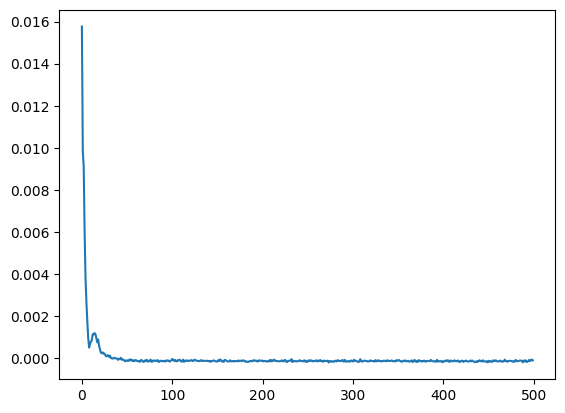

In [19]:
trained_params = trainer.final_params
import matplotlib.pyplot as plt
plt.plot(trainer.losses)
plt.show() 

In [20]:
samples = circ.sample(trained_params, shots = 1000)

In [21]:
metrics.bipartite_proportion(samples, 8)

0.372

In [22]:
generated_samples = [vec_to_graph(g, 8) for g in samples]

In [23]:
ground_truth = [vec_to_graph(g, 8) for g in train_ds]

In [24]:
metrics.sample_diversity(generated_samples)

(580, 0.58)

In [25]:
metrics.sample_diversity(ground_truth)

(190, 0.25)